## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load dataset

In [3]:
df = pd.read_csv('data.csv', names=['x1', 'x2', 'y'])
df

,x1,x2,y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1


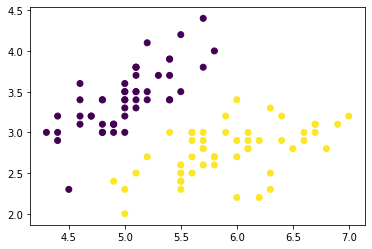

In [13]:
plt.scatter(df['x1'], df['x2'], c=df['y'])

## Train test split

In [6]:
# Shuffle data set
df = df.sample(frac=1)

train, test = df.values[:80], df.values[80:]
train_X, train_y = df.drop(columns='y').values[:80], df['y'].values[:80]
test_X, test_y = df.drop(columns='y').values[80:], df['y'].values[80:]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(80, 2) (80,) (20, 2) (20,)


In [40]:
train_X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

## Discriminative Model : Logistic Regression

In [56]:
t = np.array([3, 0, 1])
yy = np.array([2, 2, 3])
XX= np.array([[1, -1],
              [1, 2],
              [2, 3]])
np.dot((yy - t), XX)

array([ 5, 11])

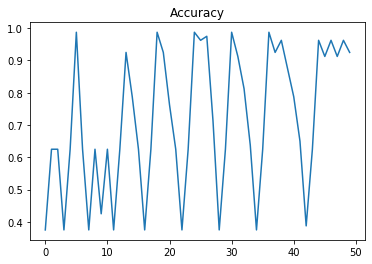

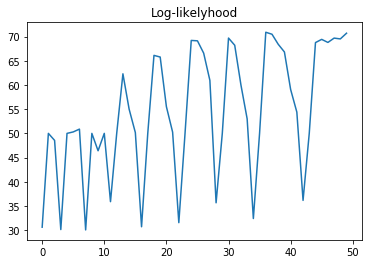

In [63]:
class LogisticResgression():
    
    def __init__(self, n_features):
        # Parameters
        self.thetas = np.random.normal(0, 1, size=(1, n_features))
        
        # Learning rate
        self.lr = 0.01
        
        # Accuracy
        self.acc = []
        
        # Log-likelyhood
        self.logl = []
    
    def sigm(self, X):
        return 1 / (1 + np.exp(-np.dot(self.thetas, X.T)))
    
    def compute_logl(self, prob, y):
        self.logl.append(np.sum(y * prob + (1 - y) * (1 - prob)))
        return self.logl[-1]
    
    def compute_acc(self, y_pred, y):
        self.acc.append((y_pred == y).mean())
        return self.acc[-1]
    
    def compute_grads(self, prob, X, y):
        return np.dot((y - prob), X)
    
    def plot_metrics(self):
        plt.plot(np.arange(len(self.acc)), self.acc)
        plt.title('Accuracy')
        plt.show()
        plt.plot(np.arange(len(self.logl)), self.logl)
        plt.title('Log-likelyhood')
        plt.show()
    
    def fit(self, X, y, nb_epoch=50):
        for i in range(nb_epoch):
            # Predict class
            prob = self.sigm(X)[0]
            y_pred = np.around(prob)
            
            # Compute prediction accuracy and log-likelyhood
            self.compute_acc(y_pred, y)
            self.compute_logl(prob, y)
            
            # Update parameter with Gradient Ascent
            grads = self.compute_grads(prob, X, y)
            self.thetas += self.lr * grads
        
        self.plot_metrics()
            
model = LogisticResgression(2)
model.fit(train_X, train_y)